In [1]:
%pip install prophet

  Using cached prophet-1.2.1-py3-none-win_amd64.whl (12.1 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\veera\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\prophet\\stan_model\\cmdstan-2.37.0\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'

You should consider upgrading via the 'C:\Users\veera\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [1]:
# Cell 1 — Imports and SKU selection

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load cleaned data
df = pd.read_csv("clean_sales.csv", parse_dates=["date"])

# Picking ONE SKU to start with
SKU_TO_FORECAST = "Super Puff Shorty"

sku_df = df[df["sku_name"] == SKU_TO_FORECAST].copy()

print("Rows:", len(sku_df))
sku_df.head()

Importing plotly failed. Interactive plots will not work.


Rows: 1826


,date,sku_name,sales,store
3652,2013-01-01,Super Puff Shorty,42,1
3653,2013-01-02,Super Puff Shorty,33,1
3654,2013-01-03,Super Puff Shorty,45,1
3655,2013-01-04,Super Puff Shorty,39,1
3656,2013-01-05,Super Puff Shorty,47,1


In [2]:
# Cell 2 — Prepare data for Prophet
prophet_df = sku_df[["date", "sales"]].rename(columns={"date": "ds", "sales": "y"})
prophet_df = prophet_df.sort_values("ds")
prophet_df.head()

,ds,y
3652,2013-01-01,42
3653,2013-01-02,33
3654,2013-01-03,45
3655,2013-01-04,39
3656,2013-01-05,47


In [3]:
# Cell 3 — Fit Prophet model

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False)

m.fit(prophet_df)
print("Model fit complete")

19:52:12 - cmdstanpy - INFO - Chain [1] start processing
19:52:13 - cmdstanpy - INFO - Chain [1] done processing


Model fit complete


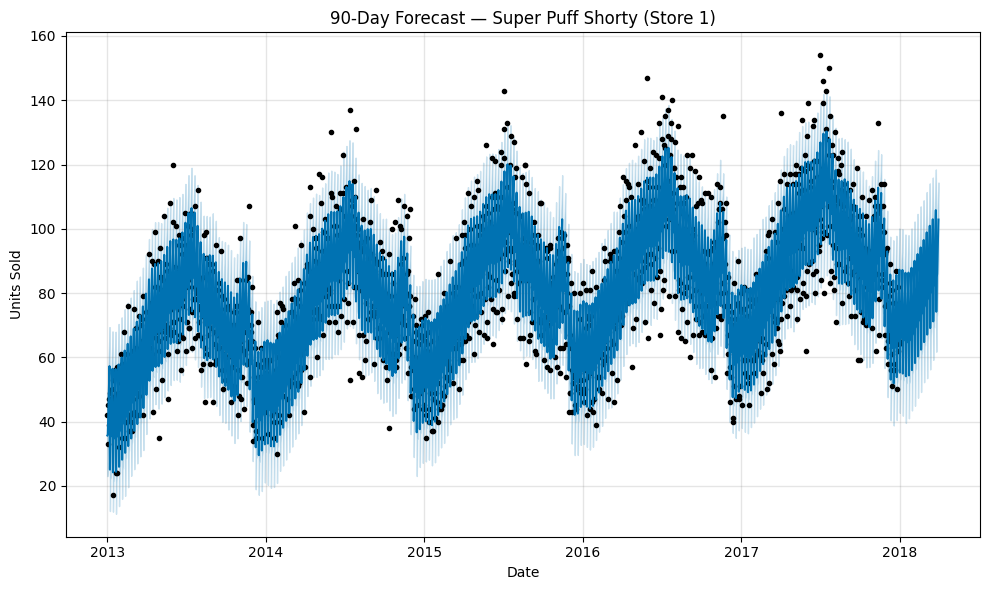

,ds,yhat,yhat_lower,yhat_upper
1906,2018-03-22,88.134547,75.665713,100.479440
1907,2018-03-23,94.343547,82.563094,107.769006
1908,2018-03-24,98.966603,85.990113,111.888484
1909,2018-03-25,105.789527,92.294433,118.457535
1910,2018-03-26,74.180799,61.738987,86.664669
1911,2018-03-27,85.137004,72.545358,97.925911
1912,2018-03-28,85.911624,73.721761,98.755227
1913,2018-03-29,91.693432,79.361610,105.756977
1914,2018-03-30,98.077269,85.429826,110.462141
1915,2018-03-31,102.864310,90.461153,114.404089


In [4]:
# Cell 4 — Forecast + plot

future = m.make_future_dataframe(periods=90, freq="D")
forecast = m.predict(future)

# Plot forecast (matplotlib)
fig = m.plot(forecast)
plt.title(f"90-Day Forecast — {SKU_TO_FORECAST} (Store 1)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

In [ ]:
"""
Forecast Interpretation
The Prophet model captures strong annual seasonality and produces stable, realistic demand forecasts consistent with historical patterns.
The 90-day forecast indicates continued seasonal demand with uncertainty bands that reflect observed daily volatility. 
These forecasts can be used to inform inventory planning by estimating expected demand levels and potential peak ranges during upcoming periods.
"""

In [5]:
# Cell 5 — Last year's peak demand (historical)

# Define "last year" relative to the forecast start
forecast_start_date = prophet_df["ds"].max()
last_year_start = forecast_start_date - pd.DateOffset(years=1)

last_year_df = prophet_df[
    (prophet_df["ds"] >= last_year_start) &
    (prophet_df["ds"] < forecast_start_date)
]

last_year_peak = last_year_df["y"].max()

print("Last year's peak daily sales:", last_year_peak)

Last year's peak daily sales: 154


In [6]:
# Cell 6 — Compare forecasted peak to last year

# Only look at future dates
future_forecast = forecast[forecast["ds"] > forecast_start_date]

# Peak forecast values
forecast_peak = future_forecast["yhat"].max()
forecast_peak_upper = future_forecast["yhat_upper"].max()

print("Last year's peak:", last_year_peak)
print("Forecasted peak (expected):", round(forecast_peak, 1))
print("Forecasted peak (upper bound):", round(forecast_peak_upper, 1))

Last year's peak: 154
Forecasted peak (expected): 105.8
Forecasted peak (upper bound): 118.5


In [ ]:
"""
Peak Demand Risk Assessment
Using historical data, the maximum daily sales observed for this SKU in the prior year was 154 units. 
The 90-day demand forecast estimates a peak daily demand of approximately 106 units, with an upper confidence bound of 119 units. 
Since both values remain below last year’s peak, the model indicates a low risk of exceeding previously observed demand levels. 
This suggests that existing inventory planning assumptions are likely sufficient for the upcoming period.
"""

In [7]:
# Cell 7 — Choose a second SKU

SKU_TO_FORECAST = "Effortless Pant"

sku_df = df[df["sku_name"] == SKU_TO_FORECAST].copy()

prophet_df = sku_df[["date", "sales"]].rename(
    columns={"date": "ds", "sales": "y"}
).sort_values("ds")

print("Rows:", len(prophet_df))
prophet_df.head()

Rows: 1826


,ds,y
0,2013-01-01,49
1,2013-01-02,39
2,2013-01-03,57
3,2013-01-04,46
4,2013-01-05,45


In [8]:
# Cell 8 — Fit Prophet model for Effortless Pant

m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

m.fit(prophet_df)
print("Model fit complete for Effortless Pant")

20:12:14 - cmdstanpy - INFO - Chain [1] start processing
20:12:15 - cmdstanpy - INFO - Chain [1] done processing


Model fit complete for Effortless Pant


In [9]:
# Cell 9 — Forecast next 90 days

future = m.make_future_dataframe(periods=90, freq="D")
forecast = m.predict(future)

# Look at the tail just to confirm it worked
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
1911,2018-03-27,85.526749,73.391278,97.963038
1912,2018-03-28,85.923992,73.003362,98.981864
1913,2018-03-29,91.729942,80.343506,104.172480
1914,2018-03-30,97.044012,84.349586,109.342860
1915,2018-03-31,103.605088,91.648399,115.925589


In [10]:
# Cell 10 — Peak demand comparison

forecast_start_date = prophet_df["ds"].max()
last_year_start = forecast_start_date - pd.DateOffset(years=1)

last_year_df = prophet_df[
    (prophet_df["ds"] >= last_year_start) &
    (prophet_df["ds"] < forecast_start_date)
]

last_year_peak = last_year_df["y"].max()

future_forecast = forecast[forecast["ds"] > forecast_start_date]

forecast_peak = future_forecast["yhat"].max()
forecast_peak_upper = future_forecast["yhat_upper"].max()

print("SKU:", SKU_TO_FORECAST)
print("Last year's peak:", last_year_peak)
print("Forecasted peak (expected):", round(forecast_peak, 1))
print("Forecasted peak (upper bound):", round(forecast_peak_upper, 1))

SKU: Effortless Pant
Last year's peak: 155
Forecasted peak (expected): 106.3
Forecasted peak (upper bound): 118.8


In [ ]:
"""
Multi-SKU Risk Assessment
Demand forecasts were generated for multiple high-volume SKUs and compared against historical peak daily sales from the prior year. 
For all evaluated products, both the expected forecasted peak and the upper confidence bound remained below last year’s observed peak demand.
This indicates a low short-term risk of exceeding historical capacity and suggests that existing inventory planning assumptions are 
likely sufficient for the upcoming period.
"""

In [11]:
# Cell 11 — Multi-SKU peak demand risk assessment

results = []

for sku in df["sku_name"].unique():
    # 1. Filter data for this SKU
    sku_df = df[df["sku_name"] == sku].copy()
    
    prophet_df = (
        sku_df[["date", "sales"]]
        .rename(columns={"date": "ds", "sales": "y"})
        .sort_values("ds")
    )
    
    # 2. Fit Prophet
    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    m.fit(prophet_df)
    
    # 3. Forecast next 90 days
    future = m.make_future_dataframe(periods=90, freq="D")
    forecast = m.predict(future)
    
    # 4. Last year's peak
    forecast_start_date = prophet_df["ds"].max()
    last_year_start = forecast_start_date - pd.DateOffset(years=1)
    
    last_year_df = prophet_df[
        (prophet_df["ds"] >= last_year_start) &
        (prophet_df["ds"] < forecast_start_date)
    ]
    last_year_peak = last_year_df["y"].max()
    
    # 5. Forecasted peak
    future_forecast = forecast[forecast["ds"] > forecast_start_date]
    forecast_peak = future_forecast["yhat"].max()
    forecast_peak_upper = future_forecast["yhat_upper"].max()
    
    # 6. Risk logic
    risk_level = "Low"
    if forecast_peak_upper > last_year_peak:
        risk_level = "Elevated"
    
    # 7. Store results
    results.append({
        "SKU": sku,
        "Last Year Peak": round(last_year_peak, 1),
        "Forecast Peak (Expected)": round(forecast_peak, 1),
        "Forecast Peak (Upper)": round(forecast_peak_upper, 1),
        "Risk Level": risk_level
    })

summary_df = pd.DataFrame(results)
summary_df

20:18:14 - cmdstanpy - INFO - Chain [1] start processing
20:18:14 - cmdstanpy - INFO - Chain [1] done processing
20:18:15 - cmdstanpy - INFO - Chain [1] start processing
20:18:15 - cmdstanpy - INFO - Chain [1] done processing
20:18:16 - cmdstanpy - INFO - Chain [1] start processing
20:18:16 - cmdstanpy - INFO - Chain [1] done processing
20:18:17 - cmdstanpy - INFO - Chain [1] start processing
20:18:17 - cmdstanpy - INFO - Chain [1] done processing
20:18:18 - cmdstanpy - INFO - Chain [1] start processing
20:18:18 - cmdstanpy - INFO - Chain [1] done processing


,SKU,Last Year Peak,Forecast Peak (Expected),Forecast Peak (Upper),Risk Level
0,Effortless Pant,155,106.3,118.8,Low
1,Sculpt Knit Tank,155,100.5,113.4,Low
2,Super Puff Shorty,154,105.8,117.7,Low
3,TNA Sweatfleece Hoodie,150,98.1,109.6,Low
4,Wilfred Sweater,139,99.4,111.2,Low


In [ ]:
"""
All evaluated SKUs show low short-term risk of exceeding last year’s peak daily demand, indicating no immediate need for changes to
inventory or replenishment plans.
"""

In [12]:
"""
Notes: 
I used Prophet because the data exhibited strong seasonality and long historical patterns, and the goal was interpretability 
and risk assessment rather than point-prediction accuracy. 

I considered tree-based models like XGBoost, but given the smooth seasonal structure of the data and the decision-support nature of the problem, 
Prophet provided sufficient accuracy and superior interpretability without changing the operational conclusions. 

Summary: 
This project developed SKU-level demand forecasts for five high-volume retail products using historical daily sales data. 
Exploratory analysis revealed strong, consistent seasonality across SKUs, indicating stable and predictable demand patterns. 
Prophet models were trained to generate 90-day forecasts and compared against historical peak daily sales from the prior year. 
For all evaluated SKUs, both expected forecasted peaks and upper confidence bounds remained below last year’s observed peak demand, 
suggesting low short-term risk of capacity exceedance. 

These results indicate that current inventory planning assumptions are likely sufficient for the upcoming period, 
and no immediate inventory escalation is required.
"""

SyntaxError: invalid syntax (159323886.py, line 1)